In [1]:
from ptt.utils import call_system_command
import xarray as xr
import pygmt
import pyshtools

mars_topo_clm = pyshtools.datasets.Mars.MarsTopo2600(lmax=719) / 1000.
mars_topo_clm.coeffs[0,0,0] = 0.
mars_topo_clm.coeffs[0,2,0] = 0.

mars_topo_map = mars_topo_clm.expand()



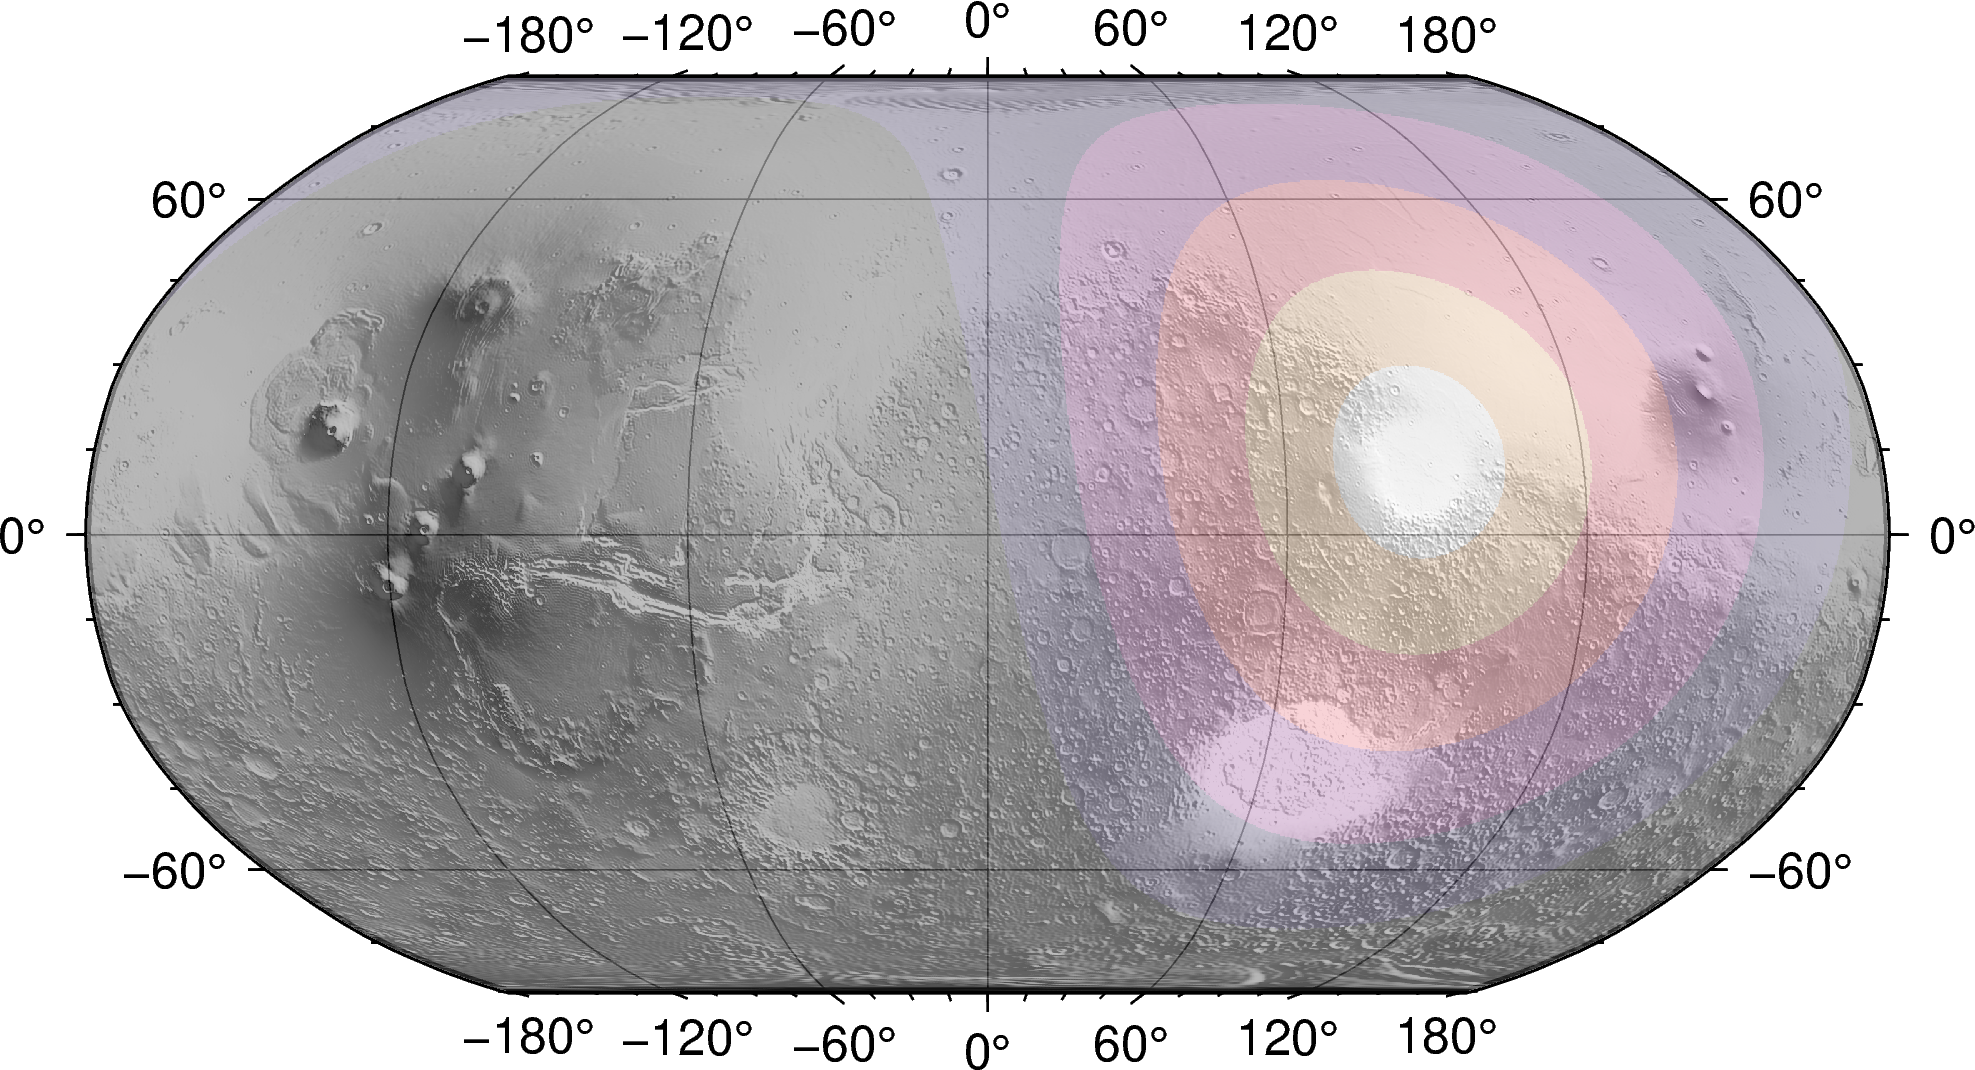

In [ ]:
call_system_command(['gmt', 'grdmath', '--PROJ_ELLIPSOID=Mars', 
                     '-R-179.875/179.875/-89.875/89.875', '-I0.25d', '70', '-42', 'SDIST', 
                     '=', 'DistanceToHellasCentre.nc'])

call_system_command(['gmt', 'grdmath', '--PROJ_ELLIPSOID=Mars', 
                     '-R-179.875/179.875/-89.875/89.875', '-I0.25d', '-45', '-48', 'SDIST', 
                     '=', 'DistanceToArgyreCentre.nc'])

call_system_command(['gmt', 'grdmath', '--PROJ_ELLIPSOID=Mars', 
                     '-R-179.875/179.875/-89.875/89.875', '-I0.25d', '87', '12.9', 'SDIST', 
                     '=', 'DistanceToIsidisCentre.nc'])

fig = pygmt.Figure()

pygmt.config(PROJ_ELLIPSOID='Mars')

fig.basemap(frame='afg', region='d', projection='N6i')

pygmt.makecpt(cmap='magma', series='1000/5000/1000', reverse=True)
#fig.grdimage(grid='DistanceToHellasCentre.nc', t=50)
fig.grdimage(grid='DistanceToIsidisCentre.nc', t=50)
#fig.grdimage(grid='DistanceToArgyreCentre.nc', t=50)

pygmt.config(COLOR_FOREGROUND='white', COLOR_BACKGROUND='black')
pygmt.makecpt(cmap='gray', series='-5/8', reverse=True)
fig.grdimage(grid=mars_topo_map.to_xarray(), shading='+a45+nt1+m0.1', n='b', transparency=50)

#fig.basemap(frame='afg')
fig.show(width=1000)


In [3]:
import geopandas as gpd

Diameter_Cutoff = 50.

gdf1 = gpd.read_file('/Users/simon/Work/Mars/craters/RobbinsCraterDatabase_20120821/RobbinsCraterDatabase_20120821_LatLonDiam.shp')
gdf1_select = gdf1[gdf1.DiamKM>Diameter_Cutoff]

gdf2 = gpd.read_file('/Users/simon/Work/Mars/craters/GoranSalamuniccar_MarsCraters/MA132843GT/MA132843GT_Mars2000.shp')
gdf2_select = gdf2[gdf2.Radius_km>Diameter_Cutoff/2.]
gdf2_select['DiamKM'] = gdf2_select.Radius_km * 2.

gdf2_select

/opt/anaconda3/envs/pygmt4/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


Lon_E        Lat    p  \
2541      9.554705 -52.917970  1.0   
6990   -168.929686  -5.523440  1.0   
7561    154.113281 -65.070312  1.0   
7579    145.515624 -41.121092  1.0   
7693     20.597659  17.800784  1.0   
...            ...        ...  ...   
132743   -9.624360  56.850234  1.0   
132794 -145.630357  77.168228  1.0   
132806 -145.097655 -56.335937  1.0   
132808  108.710937 -31.320312  1.0   
132826 -164.445312   0.195311  1.0   

                                                     Name  Radius_deg  \
2541               S130302L708882Y2010S (0,0;4,0;104,328)    0.488280   
6990                 S125853L618052Y2009S (0,0;0,0;96,32)    0.433592   
7561              S125282L502617Y2009S (88,8;4,4;112,236)    0.464845   
7579             S125264L504354Y2009S (0,0;32,-4;100,324)    0.480470   
7693             S125150L500713Y2009S (0,0;-4,4;100,-228)    0.632806   
...                                                   ...         ...   
132743  S000100B01634R00733C00011T74625Y2005S (0,0;4,0...    0.564846   
132794  S000049B00216R01265C00027Y2005S (196,-12;0,-4;...    0.439773   
132806  S000037B29776R01109T38829Y2005S (0,0;0,-4;100,...    0.464481   
132808  S000035B36207R00651T10555Y2005S (0,0;12,0;96,300)    0.632788   
132826  S000017B06039R00153T61868Y2005S (0,0;4,-4;104,...    0.878180   

        Radius_km                      geometry      DiamKM  
2541    28.890063     POINT (9.55471 -52.91797)   57.780126  
6990    25.654338   POINT (-168.92969 -5.52344)   51.308676  
7561    27.503484   POINT (154.11328 -65.07031)   55.006968  
7579    28.427968   POINT (145.51562 -41.12109)   56.855936  
7693    37.441233     POINT (20.59766 17.80078)   74.882466  
...           ...                           ...         ...  
132743  33.420243     POINT (-9.62436 56.85023)   66.840486  
132794  26.020049   POINT (-145.63036 77.16823)   52.040098  
132806  27.481947  POINT (-145.09766 -56.33594)   54.963894  
132808  37.440168   POINT (108.71094 -31.32031)   74.880336  
132826  51.959276    POINT (-164.44531 0.19531)  103.918552  

[1794 rows x 8 columns]

<ipython-input-4-75328ff9cea1>:8: SyntaxWarning: Short-form parameter (n) is not recommended. Use long-form parameter 'interpolation' instead.
  fig.grdimage(grid=mars_topo_map.to_xarray(), shading='+a45+nt1+m0.1', n='b', t=50)
<ipython-input-4-75328ff9cea1>:8: SyntaxWarning: Short-form parameter (t) is not recommended. Use long-form parameter 'transparency' instead.
  fig.grdimage(grid=mars_topo_map.to_xarray(), shading='+a45+nt1+m0.1', n='b', t=50)
<ipython-input-4-75328ff9cea1>:10: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(x=gdf1_select.geometry.x,
<ipython-input-4-75328ff9cea1>:18: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  fig.plot(x=gdf2_select.geometry.x,


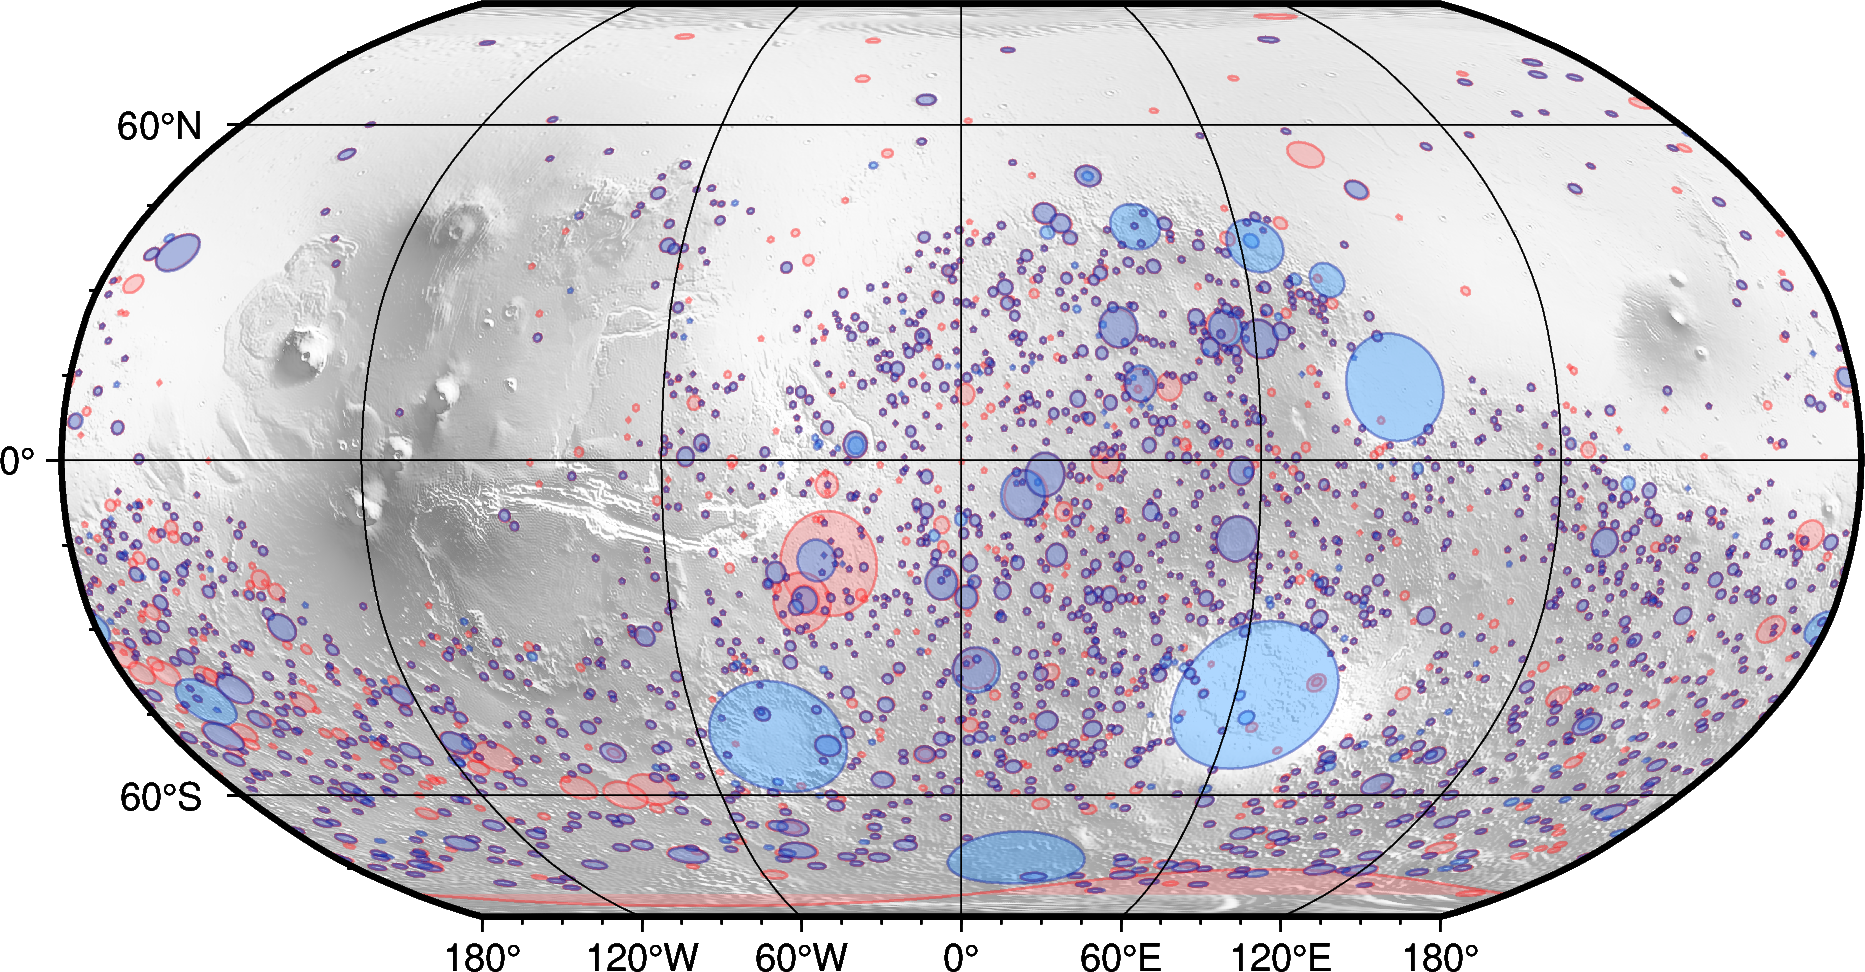

In [4]:
fig = pygmt.Figure()

fig.basemap(frame='afg', region='d', projection='N6i')

pygmt.config(PROJ_ELLIPSOID='Mars')
pygmt.config(COLOR_FOREGROUND='white', COLOR_BACKGROUND='black')
pygmt.makecpt(cmap='gray', series='-5/8', reverse=True)
fig.grdimage(grid=mars_topo_map.to_xarray(), shading='+a45+nt1+m0.1', n='b', t=50)

fig.plot(x=gdf1_select.geometry.x,
         y=gdf1_select.geometry.y,
         sizes = gdf1_select.DiamKM,
         style='E-',
         pen='0.5p,red',
         color='lightred',
         transparency=80)

fig.plot(x=gdf2_select.geometry.x,
         y=gdf2_select.geometry.y,
         sizes = gdf2_select.DiamKM,
         style='E-',
         pen='0.5p,darkblue',
         color='dodgerblue',
         transparency=80)

fig.basemap(frame='afg')
fig.show(width=1000)
